In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing as prep

In [2]:
# 3.3.1 创建随机样本：分布差异、统计概要、绘图

In [6]:
data = pd.DataFrame({'a': np.random.exponential(3,1000),
                     'b': np.random.normal(-5,0.5,1000),
                     'c': np.random.normal(0,4,1000)})

In [7]:
data.head()

,a,b,c
0,2.628057,-6.292257,-4.659769
1,0.476511,-4.799122,-2.992340
2,4.450426,-4.779723,2.177011
3,0.777194,-3.942894,1.612764
4,2.681934,-5.454352,-0.821229


In [8]:
data.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,2.865922,-5.014325,-0.077378
std,2.894211,0.509460,3.898145
min,0.004206,-6.847856,-12.861536
25%,0.735879,-5.354437,-2.807504
50%,1.898454,-5.016424,-0.031319
75%,4.083279,-4.678729,2.433380
max,25.013216,-3.289082,13.756153


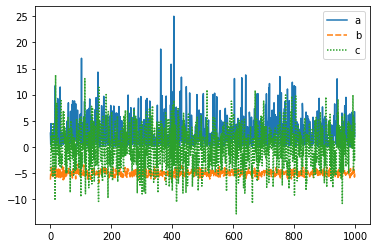

In [15]:
sns.lineplot(data=data)

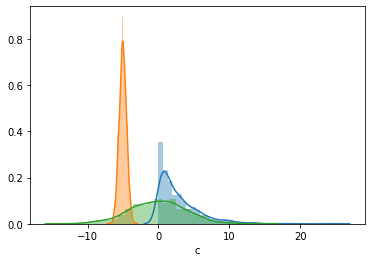

In [16]:
sns.distplot(data['a'])
sns.distplot(data['b'])
sns.distplot(data['c'])

In [9]:
# 3.3.2 归一化：minmax -> 0~1

In [13]:
# 方法1：直接调用sklearn.prep
scaler1 = prep.MinMaxScaler()
scaler1.fit(data)
scaler1.transform(data)

array([[0.10491623, 0.1561207 , 0.3081322 ],
       [0.01888541, 0.57568537, 0.37077583],
       [0.17778473, 0.58113641, 0.5649832 ],
       ...,
       [0.08878006, 0.63765114, 0.58894721],
       [0.26939514, 0.29112533, 0.37893895],
       [0.07642165, 0.55765812, 0.6613007 ]])

In [18]:
minmax1 = pd.DataFrame(scaler1.transform(data),columns=['a','b','c'])

In [19]:
minmax1.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,0.114427,0.515214,0.480288
std,0.115727,0.143156,0.146449
min,0.000000,0.000000,0.000000
25%,0.029256,0.419644,0.377720
50%,0.075743,0.514624,0.482018
75%,0.163104,0.609515,0.574615
max,1.000000,1.000000,1.000000


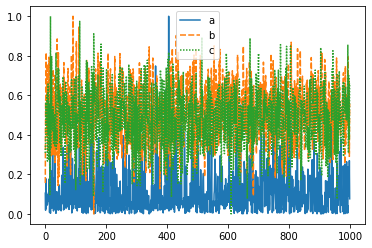

In [21]:
sns.lineplot(data=minmax1)

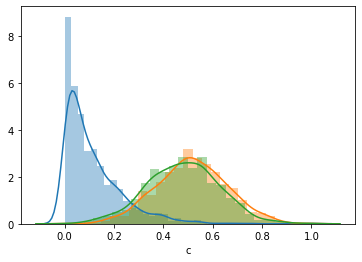

In [22]:
sns.distplot(minmax1['a'])
sns.distplot(minmax1['b'])
sns.distplot(minmax1['c'])

In [24]:
# 方式2：使用数学公式
X = data
minmax2 = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [25]:
minmax2.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,0.114427,0.515214,0.480288
std,0.115727,0.143156,0.146449
min,0.000000,0.000000,0.000000
25%,0.029256,0.419644,0.377720
50%,0.075743,0.514624,0.482018
75%,0.163104,0.609515,0.574615
max,1.000000,1.000000,1.000000


In [29]:
minmax1.round(decimals=2) == minmax2.round(decimals=2)

,a,b,c
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
995,True,True,True
996,True,True,True
997,True,True,True
998,True,True,True


In [27]:
minmax1.head()

,a,b,c
0,0.104916,0.156121,0.308132
1,0.018885,0.575685,0.370776
2,0.177785,0.581136,0.564983
3,0.030908,0.816282,0.543785
4,0.107071,0.391568,0.452342


In [28]:
minmax2.head()

,a,b,c
0,0.104916,0.156121,0.308132
1,0.018885,0.575685,0.370776
2,0.177785,0.581136,0.564983
3,0.030908,0.816282,0.543785
4,0.107071,0.391568,0.452342


In [5]:
# 3.3.3 标准化：zcore -> 0为均值 1为方差

In [31]:
# 方式1：调用standardscaler
sscaler = prep.StandardScaler()
sscaler.fit(data)
sscaler.transform(data)

array([[-0.0822276 , -2.50966249, -1.17611913],
       [-0.82599587,  0.42262559, -0.74815586],
       [ 0.54774758,  0.46072229,  0.57861302],
       ...,
       [-0.22173078,  0.85569712,  0.74232824],
       [ 1.3397534 , -1.56613103, -0.69238782],
       [-0.32857376,  0.29663529,  1.23662647]])

In [32]:
sscaler1 = pd.DataFrame(sscaler.transform(data),columns=['a','b','c'])
sscaler1.head()

,a,b,c
0,-0.082228,-2.509662,-1.176119
1,-0.825996,0.422626,-0.748156
2,0.547748,0.460722,0.578613
3,-0.722053,2.104125,0.433793
4,-0.063603,-0.864146,-0.190917


In [33]:
sscaler1.describe()

,a,b,c
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.198242e-16,-2.691181e-16,-3.619327e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-9.892672e-01,-3.600772e+00,-3.281190e+00
25%,-7.363351e-01,-6.679284e-01,-7.007157e-01
50%,-3.344442e-01,-4.122810e-03,1.182159e-02
75%,4.208284e-01,6.590595e-01,6.444127e-01
max,7.656103e+00,3.388111e+00,3.550523e+00


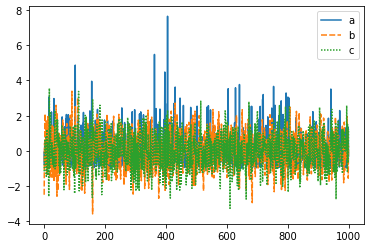

In [36]:
sns.lineplot(data=sscaler1)

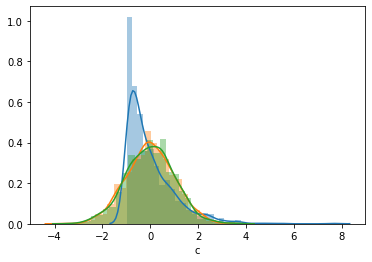

In [37]:
sns.distplot(sscaler1['a'])
sns.distplot(sscaler1['b'])
sns.distplot(sscaler1['c'])